---
## Webserver
---

Bekijk het bijgeleverde bestand: "UofS_access_log".  Hierin staat een log van een webserver.  Iedere lijn bevat informatie over een request dat naar de server werd gestuurd.  Je vindt per request volgende informatie terug:

- de naam of ip-adres van de client
- het tijdstip
- de HTTP request die gebeurde
- de HTTP response code
- het aantal bytes in de response

---

- Lees het bestand in Python.

  - Zorg ervoor dat je slechts 5 kolommen overhoudt met de namen: "client", "date", "request", "response_code", "response_length".  
  - Vervang '-' in de response.length door 0

Gebruik 3 beduidende cijfers in je antwoorden.



In [ ]:
import pandas as pd

web = pd.read_csv('../../datasets/Uofs_access_log', sep=" ", header=None, error_bad_lines=False, engine ='python')
timestamp = pd.Series(pd.to_datetime(web[[3,4]].apply(''.join, axis=1), format='[%d/%b/%Y:%H:%M:%S%z]'), name='timestamp')
web = web.drop(columns=[1,2,3,4])
web.columns=['client', 'request', 'response_code', 'response_length']
timestamp.dt.date
date = pd.Series(pd.to_datetime(timestamp.dt.date, format='%Y-%m-%d'), name = 'date')
web = web.join(date)
web['response_length'] = web.response_length.apply(lambda row: pd.to_numeric(row, errors='coerce'))
web.head()
web.info()

2021-03-18 09:33:35,631	INFO services.py:1171 -- View the Ray dashboard at http://127.0.0.1:8265


### Oefening 1
Welke response code komt het meest voor?  Aan de hand van welke frequenties kan je dit zien?


In [9]:
# web.response_code.mode()
web.response_code.value_counts().sort_index()

200    2193516
302      40716
304     151634
400        730
401         98
403        406
404      20962
500        541
501         20
Name: response_code, dtype: int64

### Oefening 2
Hoeveel procent van de requests bevat een response code die groter is dan 200?  Aan de hand van welke frequenties kan je dit berekenen?

In [12]:
1 - web.response_code.value_counts(normalize=True).sort_index().cumsum()[200]

0.08930704390018696

### Oefening 3  

Hoeveel keer komt een response code 401 voor?  Aan de hand van welke frequenties kan je dit zien?  Wat betekent deze response code?


In [14]:
web.response_code.value_counts().sort_index()[401]

98

### Oefening 4  

Welke documenten werden opgevraagd bij een response code 401?


In [19]:
pd.Series(web.request[web.response_code == 401].unique()).sort_values()

21                     GET /cgi-pts/csearch.pl HTTP/1.0
13                  GET /dcs/courses/cai/html/ HTTP/1.0
6     GET /dcs/courses/cai/html/activities/edit_acti...
9     GET /dcs/courses/cai/html/examples/a_image.htm...
7     GET /dcs/courses/cai/html/glossary/b.html HTTP...
4     GET /dcs/courses/cai/html/glossary/strong.html...
11    GET /dcs/courses/cai/html/graphics_lesson/inde...
12        GET /dcs/courses/cai/html/index.html HTTP/1.0
5     GET /dcs/courses/cai/html/introduction_lesson/...
8     GET /dcs/courses/cai/html/tools_lesson/lynx_ed...
10    GET /dcs/courses/cai/html/tools_lesson/other_t...
1                           GET /dcs/dcs-only/ HTTP/1.0
14                         GET /dcs/index.html HTTP/1.0
15                                GET /dcs/pts HTTP/1.0
3                                GET /dcs/pts/ HTTP/1.0
22            GET /dcs/pts/cgi-bin/record.html HTTP/1.0
17                     GET /dcs/pts/index.html HTTP/1.0
2                     GET /dcs/pts/record.html H

### Oefening 5  

Welke clients probeerden ongeautoriseerd een document te raadplegen?


In [ ]:
web.client[web.response_code == 401]

### Oefening 6  

Welke client probeerde het meest een ongeautoriseerd een document te raadplegen?


In [20]:
web.client[web.response_code == 401].value_counts()

skynet.usask.ca              25
cwis.usask.ca                20
duke.usask.ca                17
mercury115.terraport.net      6
andora.usask.ca               6
suncap.usask.ca               5
manitou1_5.usask.ca           3
dcs3017.usask.ca              2
ppp-4.pbmo.net                2
piglet.usask.ca               2
s066n213.csun.edu             2
198.169.132.92                1
sask.usask.ca                 1
heidelberg.cle.ab.com         1
humulus_lupulus.usask.ca      1
oa-c212-1.sheridanc.on.ca     1
lithos.usask.ca               1
pe4480.usask.ca               1
louie.csun.edu                1
Name: client, dtype: int64

### Oefening 7

Maak een taartdiagram van de response codes die niet gelijk zijn aan 200.


In [25]:
non_200 = web.response_code[web.response_code != 200]

In [49]:
freq_non_200 = non_200.value_counts().sort_index()
freq_non_200

302     40716
304    151634
400       730
401        98
403       406
404     20962
500       541
501        20
Name: response_code, dtype: int64

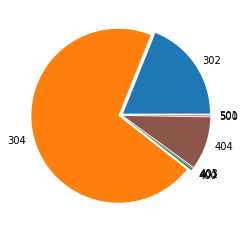

In [47]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots() #type: axes.Axes
_ = ax.pie(freq_non_200, labels=freq_non_200.index, explode=np.repeat(0.03,len(freq_non_200.index)))

### Oefening 8  

Maak een staafdiagram van dezelfde response codes.  Merk het verschil op in leesbaarheid tussen deze en de vorige afbeelding


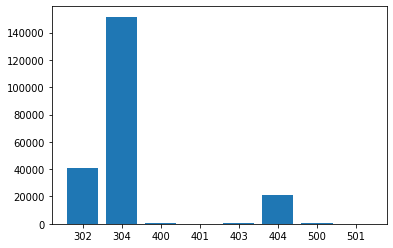

In [56]:
fig, ax = plt.subplots() #type: axes.Axes
_ = ax.bar(x=freq_non_200.index.astype(str), height=freq_non_200.to_numpy())

In [ ]:
# hier komt jouw oplossing

### Oefening 9  

Welke response code komt hier het meest voor?  Wat betekent deze response code?


In [ ]:
# hier komt jouw oplossing

### Oefening 10  

Hoe groot is de langste response die gestuurd werd?  Welk bestand werd hier doorgestuurd?


In [61]:
web[web.response_length == web.response_length.max()]

client                             request  response_code  \
127004   mac40199.usask.ca  GET /uofs/ivany_movie.mov HTTP/1.0            200   
127629       duke.usask.ca  GET /uofs/ivany_movie.mov HTTP/1.0            200   
131615   agora.carleton.ca  GET /uofs/ivany_movie.mov HTTP/1.0            200   
144938     krause.usask.ca  GET /uofs/ivany_movie.mov HTTP/1.0            200   
161552     grapes.usask.ca  GET /uofs/ivany_movie.mov HTTP/1.0            200   
164035  palona1.cns.hp.com  GET /uofs/ivany_movie.mov HTTP/1.0            200   

        response_length       date  
127004       30193824.0 1995-06-19  
127629       30193824.0 1995-06-19  
131615       30193824.0 1995-06-20  
144938       30193824.0 1995-06-21  
161552       30193824.0 1995-06-23  
164035       30193824.0 1995-06-23

### Oefening 11  

Selecteer alle regels waarbij response_length kleiner is dan 30 000 bytes.  Maak klassen van de response_length met klassenbreedte gelijk aan 1000 bytes, waarbij de linker-grens steeds bij de klasse hoort.  Hoeveel responses hebben een lengte kleiner dan 1000 bytes?


In [74]:
klein = web.response_length[web.response_length < 30000]
klassen = pd.cut(klein,range(0,30001,1000), right=False)
klassen.value_counts()

[0, 1000)         734949
[1000, 2000)      569601
[2000, 3000)      286358
[3000, 4000)      225533
[4000, 5000)       89180
[6000, 7000)       76115
[5000, 6000)       75758
[22000, 23000)     47493
[7000, 8000)       32656
[23000, 24000)     18711
[8000, 9000)       14880
[12000, 13000)     12391
[27000, 28000)     10029
[10000, 11000)      9945
[25000, 26000)      9644
[14000, 15000)      8066
[9000, 10000)       7839
[11000, 12000)      7523
[16000, 17000)      6911
[24000, 25000)      6111
[13000, 14000)      4912
[19000, 20000)      4775
[28000, 29000)      4534
[17000, 18000)      3350
[21000, 22000)      3100
[18000, 19000)      2901
[15000, 16000)      2593
[20000, 21000)      2444
[29000, 30000)      2151
[26000, 27000)      1564
Name: response_length, dtype: int64

### Oefening 12  

Hoeveel procent van de responses zijn tussen de 1000 en 2000 bytes groot?


In [79]:
ni = klassen.value_counts().sort_index()
fi = klassen.value_counts(normalize=True).sort_index() * 100
fi

[0, 1000)         32.206114
[1000, 2000)      24.960419
[2000, 3000)      12.548460
[3000, 4000)       9.883055
[4000, 5000)       3.907946
[5000, 6000)       3.319782
[6000, 7000)       3.335427
[7000, 8000)       1.431015
[8000, 9000)       0.652055
[9000, 10000)      0.343512
[10000, 11000)     0.435799
[11000, 12000)     0.329665
[12000, 13000)     0.542985
[13000, 14000)     0.215248
[14000, 15000)     0.353459
[15000, 16000)     0.113628
[16000, 17000)     0.302846
[17000, 18000)     0.146800
[18000, 19000)     0.127124
[19000, 20000)     0.209245
[20000, 21000)     0.107098
[21000, 22000)     0.135845
[22000, 23000)     2.081185
[23000, 24000)     0.819933
[24000, 25000)     0.267789
[25000, 26000)     0.422609
[26000, 27000)     0.068536
[27000, 28000)     0.439480
[28000, 29000)     0.198684
[29000, 30000)     0.094259
Name: response_length, dtype: float64

### Oefening 13  

Hoeveel procent van de responses zijn kleiner dan 6000 bytes?


In [78]:
fi.cumsum()

[0, 1000)          32.206114
[1000, 2000)       57.166533
[2000, 3000)       69.714993
[3000, 4000)       79.598049
[4000, 5000)       83.505995
[5000, 6000)       86.825777
[6000, 7000)       90.161204
[7000, 8000)       91.592219
[8000, 9000)       92.244273
[9000, 10000)      92.587785
[10000, 11000)     93.023584
[11000, 12000)     93.353248
[12000, 13000)     93.896233
[13000, 14000)     94.111481
[14000, 15000)     94.464940
[15000, 16000)     94.578568
[16000, 17000)     94.881414
[17000, 18000)     95.028214
[18000, 19000)     95.155338
[19000, 20000)     95.364583
[20000, 21000)     95.471681
[21000, 22000)     95.607526
[22000, 23000)     97.688711
[23000, 24000)     98.508644
[24000, 25000)     98.776433
[25000, 26000)     99.199042
[26000, 27000)     99.267578
[27000, 28000)     99.707057
[28000, 29000)     99.905741
[29000, 30000)    100.000000
Name: response_length, dtype: float64

### Oefening 14  

Is een response van 5000-6000 bytes groot of klein?


In [ ]:
# hier komt jouw oplossing

### Oefening 15  

Teken een barplot van de absolute frequenties


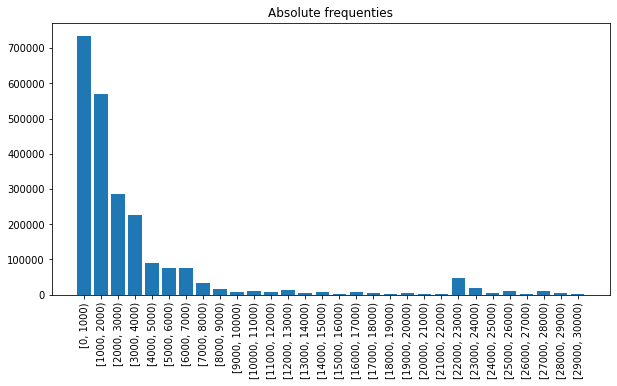

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.bar(ni.index.astype(str),ni)
_ = ax.xaxis.set_tick_params(rotation=90)
_ = ax.set_title("Absolute frequenties")

### Oefening 16  

Teken een frequentiepolygoon van de absolute frequenties

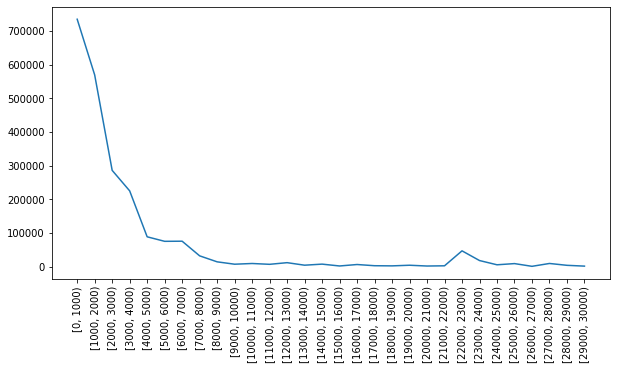

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(ni.index.astype(str),ni)
_ = ax.xaxis.set_tick_params(rotation=90)
_ = ax.set_title("Frequentiepolygoon")


### Oefening 17  

Teken een barplot van de cummulatieve frequenties

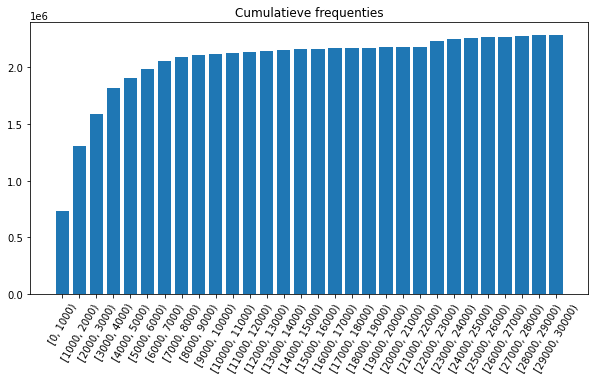

In [112]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.bar(ni.index.astype(str),ni.cumsum())
_ = ax.xaxis.set_tick_params(rotation=60)
_ = ax.set_title("Cumulatieve frequenties")

### Oefening 18  

Maak een staafdiagram van de absolute frequenties van de datums.

In [119]:
dagelijkse_load = web.date.value_counts()
dagelijkse_load

fig, ax = plt.subplots(figsize=(10,5))
_ = ax.bar(dagelijkse_load.index, dagelijkse_load)

1995-11-07    21166
1995-11-09    19906
1995-10-24    19204
1995-11-29    19115
1995-12-20    19048
              ...  
1995-07-01     4621
1995-06-10     4487
1995-06-11     4477
1995-06-03     4025
1995-06-04     3638
Name: date, Length: 214, dtype: int64

### Oefening 19  

Wat zie je?

In [ ]:
# hier komt jouw oplossing